# Jupyter Notebook Cheat Sheet

In [1]:
import tbcontrol
tbcontrol.expectversion('0.1.2')

In [22]:
import numpy as np
import scipy

In [ ]:
# Numerics
a = np.array([1, 2, 3])
t = np.linspace(0, 10)
a.any() 
t.any()

In [ ]:
# displaying as tuple
a, t

In [3]:
# Basic Plotting function
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plotfuncs = [plt.plot,
             plt.stem,
             plt.scatter,
             plt.semilogx,
             plt.semilogy,
             plt.loglog]

for i, func in enumerate(plotfuncs , 1):
    plt.subplot(2, 3, i)
    func([1, 2, 3], [2, 1, 2])
    plt.title(func.__name__)
plt.tight_layout()

In [6]:
import sympy
sympy.init_printing()

In [ ]:
s = sympy.Symbol('s')  # A single symbol
tau, K_c = sympy.symbols('tau K_c', positive=True) # we can use real=True or complex=True for other kinds of variables

In [ ]:
Gc = K_c * ((tau*s + 1) / (tau*s))
GvGpGm = 5 / ((10*s + 1) ** 2)

In [ ]:
#  Working with rational functions and polynomials
chareq = GvGpGm * Gc + 1
chareq

In [ ]:
# cancel() function forces this to be a fraction. collect collect terms.
chareq = chareq.cancel().collect(s)
chareq

In [ ]:
# Factoring
chareq.factor(s)

In [ ]:
# Obtaining the numerator and denominator
sympy.numer(chareq), sympy.denom(chareq)

In [ ]:
chareq.as_numer_denom()

In [ ]:
numer = sympy.poly(sympy.numer(chareq), s)

In [ ]:
numer.all_coeffs()

In [5]:
from tbcontrol.symbolic import routh

In [ ]:
routh(numer)

In [ ]:
f = sympy.lambdify((K_c, tau), K_c + tau)

In [ ]:
f(1, 2)

## Functions useful for discrete systems

In [8]:
z, q = sympy.symbols('z, q')

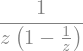

In [10]:
Gz = z**-1/(1 - z**-1)
Gz

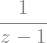

In [11]:
Gz.cancel()

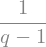

In [12]:
Gz.subs({z: q**1}).cancel()

In [13]:
from tbcontrol.symbolic import sampledvalues

In [14]:
sampledvalues(Gz, z, 10)

##  Equation Solving

In [16]:
x, y, z, a= sympy.symbols('x, y, z, a')
residuals = [x + y - 2, y + z - a, x + y + z]
unknowns = [x, y, z]
sympy.solve(residuals, unknowns)

## Numeric Sympy

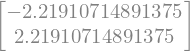

In [17]:
residuals = [2*x**2 - 2*y**2, sympy.sin(x) + sympy.log(y)]
unknowns = [x, y]
sympy.nsolve(residuals, unknowns, [1, 3])

### Numeric

In [18]:
import scipy.optimize

In [26]:
def residuals(unknowns):
    x, y = unknowns
    return [2 * x**2 - 2*y**2, np.sin(x) + np.log(y)]

In [27]:
starting_point = [1, 3]

In [28]:
residuals(starting_point)

In [29]:
scipy.optimize.fsolve(residuals, starting_point)

array([-2.21910715,  2.21910715])